In [ ]:
import kagglehub
import shutil
import os

# Download dataset
source_path = kagglehub.dataset_download("adilshamim8/salaries-for-data-science-jobs")

# Destination directory where YOU want it
dest_path = r"add your path here"

# Create destination if it doesn't exist
os.makedirs(dest_path, exist_ok=True)

# Copy all files from KaggleHub cache to your folder
for file in os.listdir(source_path):
    shutil.copy(os.path.join(source_path, file), dest_path)

print("Copied dataset files to:", dest_path)


Copied dataset files to: C:\Users\pagar\OneDrive\Desktop\projects\salarytrends


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("salaries.csv")

In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


#### What are we can do with this dataset? What all can we learn from this dataset?

Let's first understand what columns we have in the dataset. The columns include: <br>
a. work_year: 2020 to 2025 <br>
b. experience level: EN: Entry-level / Junior, MI: Mid-level / Intermediate, SE: Senior-level, EX: Executive / Director <br>
c. employment type: FT: full-time, PT: part-time, CT: contract, FL:freelance
d. job title: 422 different job titles (yes, it's a lot) <br>
e. salary: this is the gross annual salary before taxes and deductions <br>
f: salary_currency: USD, EUR, INR <br>
g. salary_in_usd: employee's salary converted into USD using 2025 exchange rates for standardised comparison <br>
h. employee_residence: eg. "US" etc. <br>
i: remote_ratio: 0: no remote work, 50: hybrid, 100:fully remote <br>
j: company_location: eg. "US" etc.  <br>
k: company_size: S:small(1-50), M:medium (51-500), L:large (500+) <br>



In [29]:
# print(df["job_title"].value_counts())
# print("*" * 40)
# print(df["job_title"].unique())
# print("*" * 40)
# print(df["job_title"].nunique())

#### Let's see the salary trend over the 5 years (also cna understand the effect of the Corona-Virus)

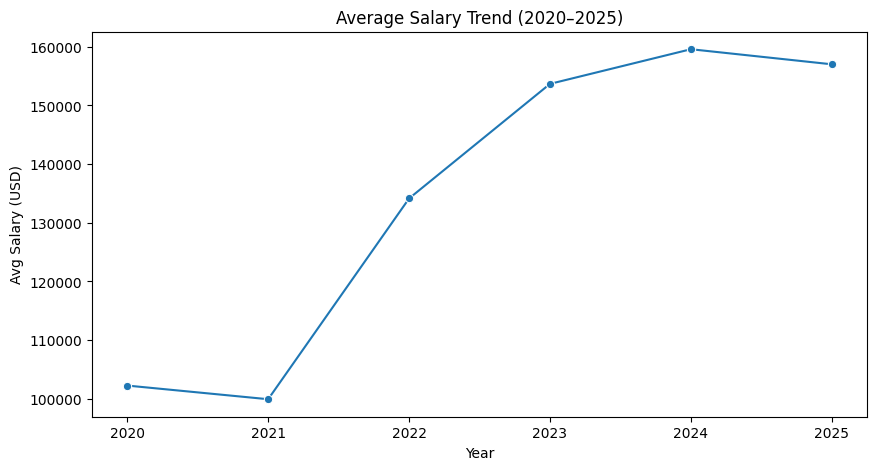

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("work_year")['salary_in_usd'].mean().reset_index(),
             x="work_year", y="salary_in_usd", marker='o')
plt.title("Average Salary Trend (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Avg Salary (USD)")
plt.show()


#### What is the distribution of the salaries?

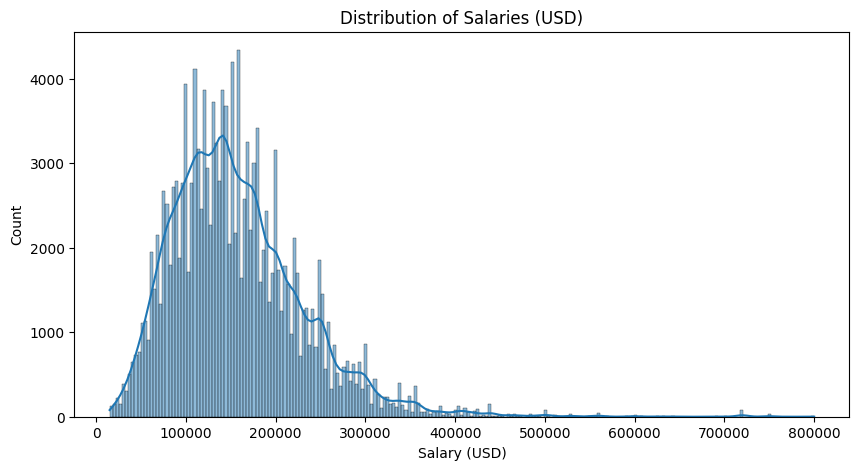

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribution of Salaries (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()


#### Do higher roles (seniority) earn more? (I mean it's obvious but let's confirm it by plotting it)

C:\Users\pagar\AppData\Local\Temp\ipykernel_45400\2985932618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="experience_level", y="salary_in_usd", estimator="mean", palette="viridis")


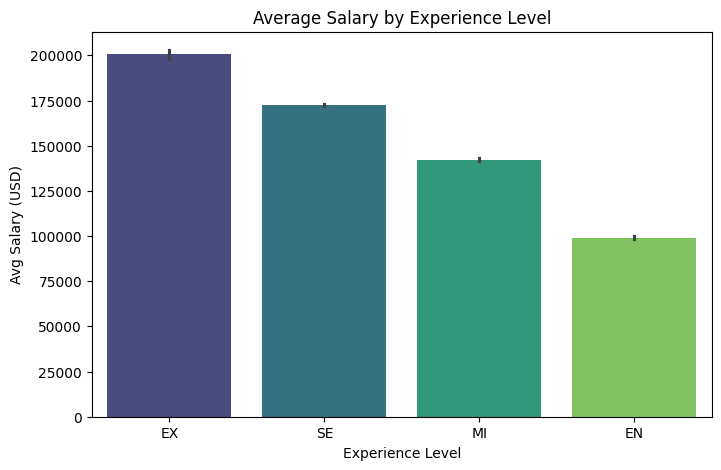

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="experience_level", y="salary_in_usd", estimator="mean", palette="viridis")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Avg Salary (USD)")
plt.show()


This makes sense, as we move towards higher level in our roles we earn more

#### Which job titles pays the most?

C:\Users\pagar\AppData\Local\Temp\ipykernel_45400\3150848737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="magma")


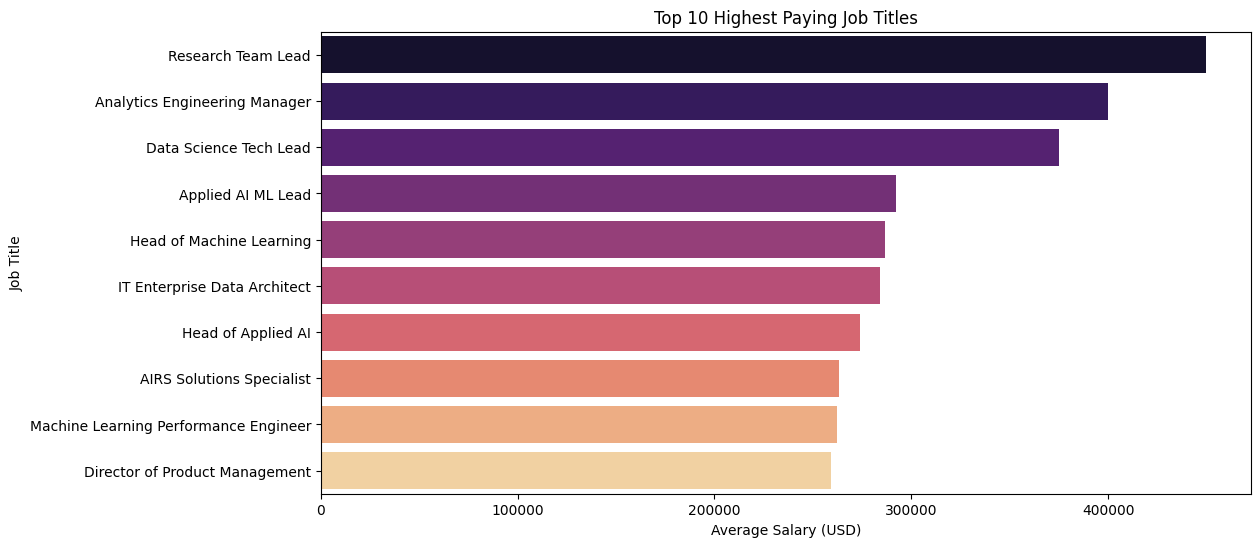

In [19]:
plt.figure(figsize=(12,6))
top_jobs = df.groupby("job_title")['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="magma")
plt.title("Top 10 Highest Paying Job Titles")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.show()


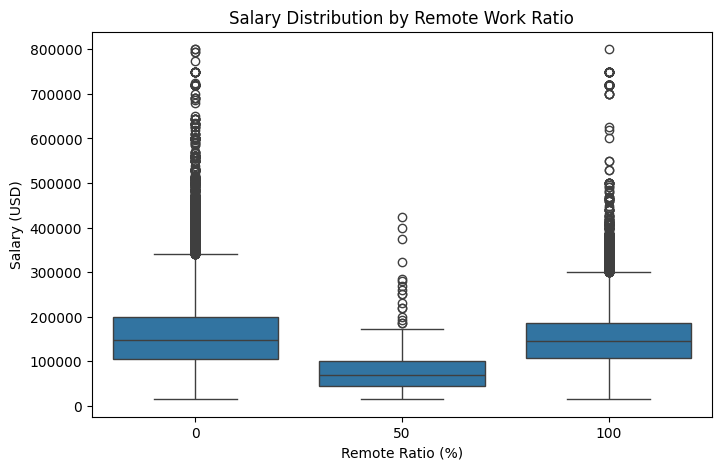

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd")
plt.title("Salary Distribution by Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()


#### Do larger companies pay more?

C:\Users\pagar\AppData\Local\Temp\ipykernel_45400\3526692604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="company_size", y="salary_in_usd", estimator="mean", palette="coolwarm")


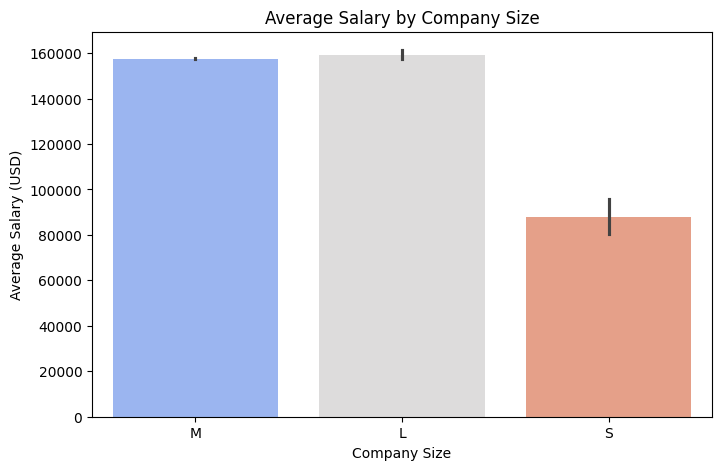

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="company_size", y="salary_in_usd", estimator="mean", palette="coolwarm")
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()


#### How does salaries vary across countries?

C:\Users\pagar\AppData\Local\Temp\ipykernel_45400\3492661279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


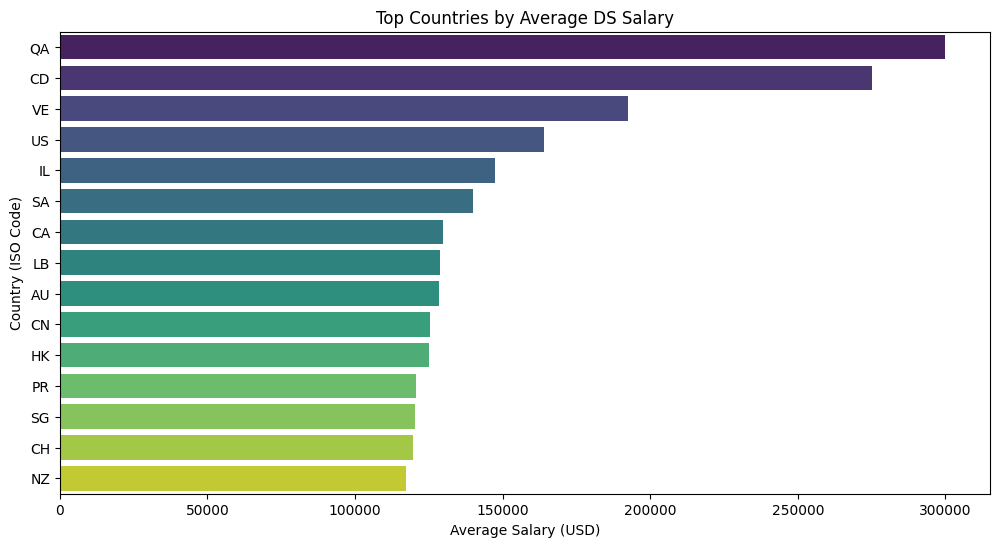

In [23]:
plt.figure(figsize=(12,6))
top_countries = df.groupby("employee_residence")['salary_in_usd'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top Countries by Average DS Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country (ISO Code)")
plt.show()


#### Is the remote ratio related to company size?

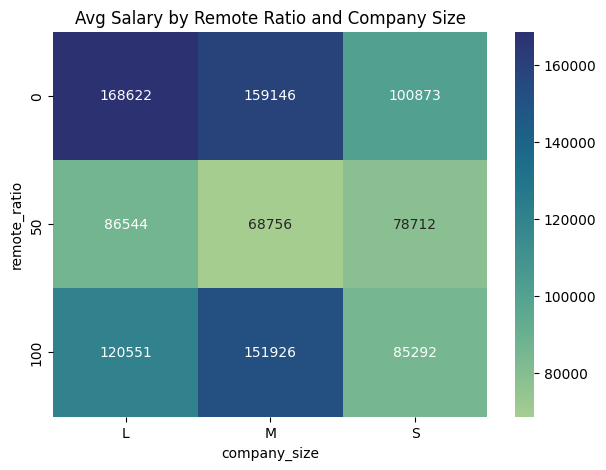

In [26]:
plt.figure(figsize=(7,5))
pivot = df.pivot_table(values='salary_in_usd', index='remote_ratio', columns='company_size', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="crest")
plt.title("Avg Salary by Remote Ratio and Company Size")
plt.show()
